## Sudoku Constraint Propagation Solver
> In this notebook we demonstrate solving Sudoku puzzles using constraint propagation.

### Rules of Sudoku
> A Sudoku board consists of 81 squares, some of which are initially ﬁlled with digits from 1 to 9. 
![Sudoku rules](images/sudoku_initial.png)


>The objective of the puzzle  is to ﬁll in all the remaining squares in such a way that no digit appears twice in any row, column, or 3×3 box. There are 9 rows, 9 columns and 9 3x3 boxes. We define a row, column, and 3x3 box as a unit.

![Sudoku rules](images/sudoku_rules.png)


> A solution for board above would be as following:

![Sudoku rules](images/sudoku_solved.png)

> There are other variations of Sudoku such as that the diagonals must not contain a digit more than once.  Our implementation of Sudoku includes an option to also include the diagonals as a constraint unit.

### 1) Import sudoku module

> The `sudoku` module has a class called `Sudoku` to solve Sudoku puzzles. The `Sudoku` class inherits from the `ConstraintSolver` abstract base class.  The `Sudoku` class maintains a list of variables for each box and domain values 1 through 9.   The class defines global constraints for the Sudoku constraints groups (i.e. rows, columns and 3x3 boxes).

> The `ConstraintSolver` abstract class defines two functions for reducing the problem using arc consistency and a function for searching for a solution when inference is not enough.

> * 	 The first reduction function is an elimination algorithm that removes any variable in the constraint that has a singleton domain and then removes that value from the domains of the remaining variables.  The second reduction function is an only-choice algorithm that assigns a value to a variable when that value does not fit in any of the other variables.


> * The search function is a depth-first recursive method that attempts to find a solution by choosing the variable with the least remaining values in its domain. It then iteratively assigns to this variable one of its domain values, and  calls the reduction functions to try and find a solution.  If a solution is found it returns this solved state, otherwise it returns false.


> * 	The `ConstraintSolver` abstract class also has other properties and methods to take advantage of code reuse.  

In [1]:
%load_ext autoreload
%aimport sudoku
%aimport solver
%autoreload 1

%matplotlib inline
from sudoku import *

In [2]:
print(Sudoku.__doc__)


        Class for solving sudoku puzzle using constraint propagation.  
        Inherits from 'ConstrainSolver' base class that uses 'elimination'
        and 'only_choice' algorithms to solve constraint problems. 

        Parameter
        ------------
        grid: str
            A string representing a sudoku grid.
            Example board as string: '5.............62....1....7...6..8...3...9...7...6..4...4....8....52.............3' 
            The '.' represents a blank cell.  The first character represnts the top left most cell and
            the second character the cell to the right of the top left most cell..etc.

            Its corresponding board would be as follows:
            5 . . |. . . |. . . 
            . . . |. . 6 |2 . . 
            . . 1 |. . . |. 7 . 
            ------+------+------
            . . 6 |. . 8 |. . . 
            3 . . |. 9 . |. . 7 
            . . . |6 . . |4 . . 
            ------+------+------
            . 4 . |. . . |8 . . 
          

### 2) Import list of puzzles
> Here we import a list of Sudoku puzzles to test our `'Sudoku'` class

In [3]:
boards = puzzles()
boards[0:5]

['4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......',
 '52...6.........7.13...........4..8..6......5...........418.........3..2...87.....',
 '6.....8.3.4.7.................5.4.7.3..2.....1.6.......2.....5.....8.6......1....',
 '48.3............71.2.......7.5....6....2..8.............1.76...3.....4......5....',
 '....14....3....2...7..........9...3.6.1.............8.2.....1.4....5.6.....7.8...']

### 3) Solve one puzzle
> Lets go through the process of solving one puzzle and display the board.

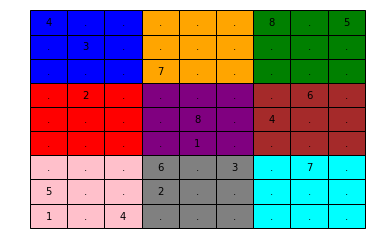

In [4]:
board1 = boards[0]
sudoku1 = Sudoku(board1)

#let display the initial board 
sudoku1.display_org()

#### Display the pre-proccessed board
> The initial board is pre-processed and we put 1 - 9 in all the spaces that are blank.

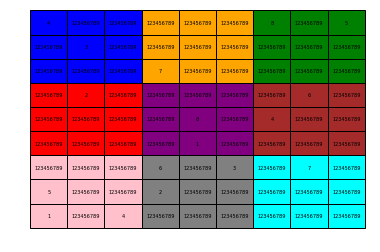

In [5]:
sudoku1.display_state()

#### Lets attempt to solve our puzzle
> To solve we call the `'solve()'` method. 

Puzzze was solved


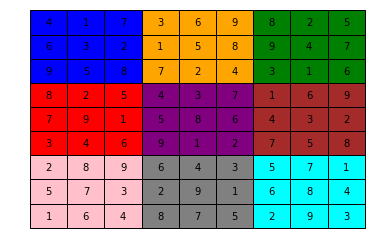

The reduction functions  were called 5 time(s) and the search function was called 4 time(s).


In [6]:
solved = sudoku1.solve()
print("Puzzze was solved" if solved else "Puzzle was not solved.")
sudoku1.display_state()

#How many times did we call our reduction and search functions.  
#The 'ConstraintSolver' base class has two reduction functions: elimination and only-choice.
#The Sudoku class added one more reduction based on the naked twins algorithm.  
# In total the 'Sudoku' class has three reduction functions.
reduce_call_count = sudoku1.reduce_count
search_call_count = sudoku1.search_count
msg = "The reduction functions  were called {} time(s) and the search function was called {} time(s)."
print(msg.format(reduce_call_count,search_call_count))

### 4) Solve all the remaining puzzes
> Now lets try and solve all the puzzles and display the results.

In [7]:
import pandas as pd

def solve_all(boards:list,verbose:int =1, diagonal:bool = False):
    """ """
    board_name = []
    result = []
    reduce_call_count = []
    search_call_count = []
    
    for idx, board in enumerate(boards,1):
        puzzle = Sudoku(board,diagonal)
        solved = puzzle.solve()
        
        if verbose ==1:
            msg = "Board {}: Result: {} Reduce count: {} Search count {}"
            print(msg.format(idx, solved, puzzle.reduce_count, puzzle.search_count))

        #update lists
        board_name.append("Board {}".format(idx))
        result.append(solved)
        reduce_call_count.append(puzzle.reduce_count)
        search_call_count.append(puzzle.search_count)
    
    #create dictionary table from lists
    table = dict()
    table['Board_Number'] = board_name
    table['Result'] = result
    table['Reduce Count'] = reduce_call_count
    table['Search Count'] = search_call_count

    #return dataframe
    return pd.DataFrame(table)

In [8]:
tb = solve_all(boards)

Board 1: Result: True Reduce count: 5 Search count 4
Board 2: Result: True Reduce count: 37 Search count 19
Board 3: Result: True Reduce count: 66 Search count 34
Board 4: Result: True Reduce count: 179 Search count 87
Board 5: Result: True Reduce count: 51 Search count 27
Board 6: Result: True Reduce count: 73 Search count 35
Board 7: Result: True Reduce count: 13 Search count 8
Board 8: Result: True Reduce count: 7 Search count 5
Board 9: Result: True Reduce count: 19 Search count 11
Board 10: Result: True Reduce count: 203 Search count 101
Board 11: Result: True Reduce count: 57 Search count 28
Board 12: Result: True Reduce count: 77 Search count 40
Board 13: Result: True Reduce count: 120 Search count 61
Board 14: Result: True Reduce count: 95 Search count 47
Board 15: Result: True Reduce count: 42 Search count 23
Board 16: Result: True Reduce count: 4 Search count 2
Board 17: Result: True Reduce count: 7 Search count 3
Board 18: Result: True Reduce count: 2 Search count 1
Board 19

Puzzles solved 106 out 106.
----------------------------------------


,Reduce Count,Search Count
count,106.000000,106.000000
mean,38.009434,19.575472
std,52.058300,25.664854
min,1.000000,0.000000
25%,9.000000,6.000000
50%,22.000000,11.500000
75%,51.750000,26.000000
max,427.000000,211.000000


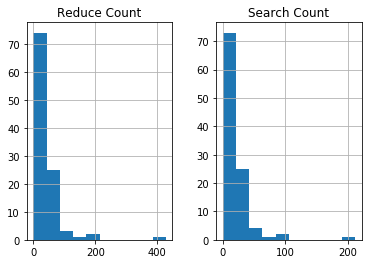

In [9]:
#percent was solve
solve_count = len(tb[tb['Result'] == True])
print("Puzzles solved {} out {}.".format(solve_count,len(tb)))
print("-"*40)

#print historgrams
tb[['Reduce Count','Search Count']].hist()

#print stats
tb[['Reduce Count','Search Count']].describe()

#### Solve all puzzles but diagonal constraint
> Lets try and solve  all boards and enforce a diagonal constraint.

In [10]:
tb2 = solve_all(boards,diagonal= True)

Board 1: Result: False Reduce count: 1 Search count 0
Board 2: Result: False Reduce count: 1 Search count 0
Board 3: Result: False Reduce count: 5 Search count 2
Board 4: Result: False Reduce count: 1 Search count 0
Board 5: Result: False Reduce count: 7 Search count 3
Board 6: Result: False Reduce count: 1 Search count 0
Board 7: Result: False Reduce count: 1 Search count 0
Board 8: Result: False Reduce count: 1 Search count 0
Board 9: Result: False Reduce count: 1 Search count 0
Board 10: Result: False Reduce count: 30 Search count 14
Board 11: Result: False Reduce count: 1 Search count 0
Board 12: Result: False Reduce count: 1 Search count 0
Board 13: Result: False Reduce count: 1 Search count 0
Board 14: Result: False Reduce count: 1 Search count 0
Board 15: Result: False Reduce count: 1 Search count 0
Board 16: Result: False Reduce count: 1 Search count 0
Board 17: Result: False Reduce count: 1 Search count 0
Board 18: Result: False Reduce count: 1 Search count 0
Board 19: Result:

In [11]:
#percent solve with diagonal constraint
solve_count = len(tb2[tb2['Result'] == True])
print("Puzzles solved {} out {} with diagonal.".format(solve_count,len(tb2)))
print("-"*40)

Puzzles solved 0 out 106 with diagonal.
----------------------------------------


#### Adding a diagonal constrain
> When we add a diagonal constraint none of our boards are solveable and thats
because these boards are not diagonal sudoku boards.  But now lets take a look
at some diagonal sudoku boards.

In [12]:
#import some diagonal sudoku boars
diag_boards = puzzles_diagonal()
print(diag_boards)

['..7431.......9...7.6.57..93..3.1.84...2..4...4......6.....5.1...4.....7.......5..', '....3......516.24..16.54..3.5.4...2.67..........6......9...678..2...9..........1.', '3..8.......97....6...5..1.9...1.....9......5..43.....2..56...1.7..4.....6..295.7.', '.......8......4................5...1..8.........2.98.7.6148.23..47..3.1..3.6.1.48', '..9..1.5.....96...5......9.84.3..91.......4.89.....3.......9.......58173.5..4....', '................47.37....21.....71.6........21.52......1.......562.9..3....36..18', '2..91.56.............5.....71.......94.....1......4297.23..5.7...7.43..2........5', '.2...4.195..6...8....1.9..6.3....5.4........1....5...8.....5.6...9...7......1789.', '7.198......2.3..8.59..4....81.3...........1...2............9.4....25......6.738.1', '..7..........8.6........79.9..348.1..1......8....679....6...523...67....49.......']


In [13]:
print("Lets solve the diagonal sudoku boards")
print("-"*40)
_ = solve_all(diag_boards,diagonal=True)

print("\n\nLets solve the diagonal sudoku boards and not enforce diagonal constraint")
print("-"*40)
_ = solve_all(diag_boards,diagonal=False)

Lets solve the diagonal sudoku boards
----------------------------------------
Board 1: Result: True Reduce count: 6 Search count 4
Board 2: Result: True Reduce count: 6 Search count 4
Board 3: Result: True Reduce count: 5 Search count 4
Board 4: Result: True Reduce count: 2 Search count 1
Board 5: Result: True Reduce count: 5 Search count 3
Board 6: Result: True Reduce count: 4 Search count 2
Board 7: Result: True Reduce count: 5 Search count 3
Board 8: Result: True Reduce count: 6 Search count 3
Board 9: Result: True Reduce count: 7 Search count 3
Board 10: Result: True Reduce count: 4 Search count 2


Lets solve the diagonal sudoku boards and not enforce diagonal constraint
----------------------------------------
Board 1: Result: True Reduce count: 11 Search count 9
Board 2: Result: True Reduce count: 14 Search count 13
Board 3: Result: True Reduce count: 15 Search count 11
Board 4: Result: True Reduce count: 15 Search count 14
Board 5: Result: True Reduce count: 14 Search count 12